In [21]:
# Importing Libarires 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from collections import Counter 
from skimage.feature import hog
import warnings
warnings.filterwarnings('ignore')


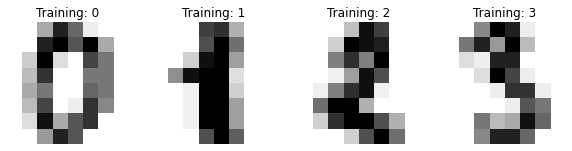

In [3]:
digits =load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split( data, digits.target, test_size=0.5, shuffle=False )

In [5]:
Model = MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), alpha = 0.3)
Model.fit(X_train, y_train)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(200, 200))

In [6]:
print("Training Score :: {}\n".format(Model.score(X_train, y_train)))
print("Testing Score :: {}\n".format(Model.score(X_test, y_test)))

Training Score :: 1.0

Testing Score :: 0.9477196885428254



In [8]:
predicted = Model.predict(X_test)
confusion_matrix(y_test,predicted)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 83,  0,  2,  0,  1,  1,  0,  0,  4],
       [ 0,  0, 84,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  5,  0,  1,  6,  0],
       [ 0,  1,  0,  0, 86,  0,  2,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 88,  1,  0],
       [ 0,  3,  0,  1,  0,  3,  0,  0, 81,  0],
       [ 1,  0,  0,  1,  0,  3,  0,  0,  0, 87]])

In [11]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.94      0.91      0.93        91
           2       1.00      0.98      0.99        86
           3       0.93      0.87      0.90        91
           4       0.99      0.93      0.96        92
           5       0.88      0.96      0.92        91
           6       0.96      0.99      0.97        91
           7       0.99      0.99      0.99        89
           8       0.92      0.92      0.92        88
           9       0.90      0.95      0.92        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



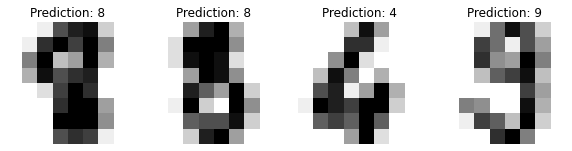

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 83  0  2  0  1  1  0  0  4]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 79  0  5  0  1  6  0]
 [ 0  1  0  0 86  0  2  0  0  3]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  3  0  1  0  3  0  0 81  0]
 [ 1  0  0  1  0  3  0  0  0 87]]


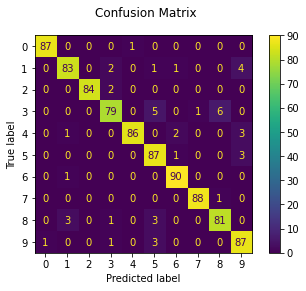

In [13]:
disp = plot_confusion_matrix(Model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
clf = SVC(gamma=0.001)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



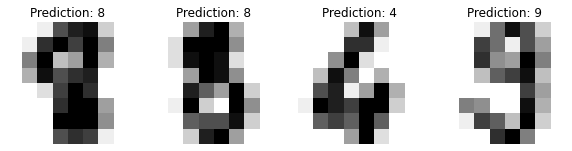

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [18]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.78      0.59      0.68        91
           2       0.86      0.73      0.79        86
           3       0.72      0.76      0.74        91
           4       0.73      0.80      0.77        92
           5       0.57      0.78      0.66        91
           6       0.86      0.84      0.85        91
           7       0.86      0.73      0.79        89
           8       0.59      0.58      0.59        88
           9       0.66      0.73      0.69        92

    accuracy                           0.75       899
   macro avg       0.76      0.75      0.75       899
weighted avg       0.76      0.75      0.75       899



In [20]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.95      0.89      0.92        91
           2       0.96      0.91      0.93        86
           3       0.90      0.86      0.88        91
           4       0.99      0.95      0.97        92
           5       0.88      0.96      0.92        91
           6       0.99      0.98      0.98        91
           7       0.93      0.99      0.96        89
           8       0.95      0.91      0.93        88
           9       0.86      0.95      0.90        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899



In [22]:
clf4 = LogisticRegression()
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899

